# R深入学习笔记1: 认识R的数据结构与图表

虽然学R几个月，用了不少，做了不少事情。但是总感觉对R没有学到深处，准备拿起《R in a Nutshell》深入学习和理解R，感受它深层次的魅力。有兴趣的朋友欢迎一起学习交流，初学的朋友还是推荐《R实战 (第二版)》和《R编程艺术》等中文书入手。当然这不妨碍咱们的相互学习和交流。

因为是笔记，有的不求甚解，有的太基础的东西我也直接略过。一入编程深似海，欢迎各位看官老爷们点评指正。


### 数据结构

**Array object**  可以多维

In [1]:
a <- array(c(1,2,3,4,5,6,7,8,9,10,11,12), dim=c(3,4))

In [2]:
a

1,4,7,10
2,5,8,11
3,6,9,12


**matrix**仅二维

In [3]:
m <- matrix(data=c(1,2,3,4,5,6,7,8,9,10,11,12), nrow=3, ncol=4)

In [4]:
m

1,4,7,10
2,5,8,11
3,6,9,12


**List** 可以包含不同的数据对象

In [5]:
# a list containing two strings
e <- list(thing="hat", size="8.25")
e

$thing
[1] "hat"

$size
[1] "8.25"

In [6]:
# 提取元素
e$thing
e[1]
e[[1]]

[1] "hat"

$thing
[1] "hat"

[1] "hat"

**data frame**是一个特殊列表，包含相同的长度的1个或多个变量

In [7]:
teams <- c("PHI", "NYM", "FLA", "ATL", "WSN")
w <- c(92, 89, 94, 72, 59)
l <- c(70, 73, 77, 90, 102)
nleast <- data.frame(teams, w, l)  # 通过变量构建数据框
nleast

teams,w,l
PHI,92,70
NYM,89,73
FLA,94,77
ATL,72,90
WSN,59,102


In [8]:
nleast$w

[1] 92 89 94 72 59

In [9]:
nleast$teams == "FLA"

[1] FALSE FALSE  TRUE FALSE FALSE

In [10]:
nleast$l[nleast$teams=="FLA"]

[1] 77

**R是面向对象的语言。每一个R中的对象都有类型，另外，R中对象都是某个类的成员。**
常见的类有：字符串对象，数值对象，数据框，列表，数组等。

**模型与公式**

在统计学中，**模型**是一种用来描述数据的精简方式，通常通过一个数学公式来表述。

我们常见的线性回归分析就是一个典型的模型（线性模型）和公式（回归公式）的代表：

In [11]:
cars.lm <- lm(formula=dist~speed, data=cars)
cars.lm


Call:
lm(formula = dist ~ speed, data = cars)

Coefficients:
(Intercept)        speed  
    -17.579        3.932  


可以看到回归公式的截距与回归系数，通过`summary`我们还可以进一步观察更为详细的模型结果：

In [12]:
summary(cars.lm)


Call:
lm(formula = dist ~ speed, data = cars)

Residuals:
    Min      1Q  Median      3Q     Max 
-29.069  -9.525  -2.272   9.215  43.201 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -17.5791     6.7584  -2.601   0.0123 *  
speed         3.9324     0.4155   9.464 1.49e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 15.38 on 48 degrees of freedom
Multiple R-squared:  0.6511,	Adjusted R-squared:  0.6438 
F-statistic: 89.57 on 1 and 48 DF,  p-value: 1.49e-12


图表也是R中最常见，我们最常用的操作对象。

**R**包含几个最常见的用来可视化分析的包：`graphics`，`grid`，`lattice`。

先尝鲜：

In [14]:
install.packages("nutshell")
library(nutshell)
data(field.goals)

also installing the dependencies ‘nutshell.bbdb’, ‘nutshell.audioscrobbler’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Loading required package: nutshell.bbdb
Loading required package: nutshell.audioscrobbler


In [15]:
names(field.goals)

[1] "home.team"    "week"         "qtr"          "away.team"    "offense"     
 [6] "defense"      "play.type"    "player"       "yards"        "stadium.type"

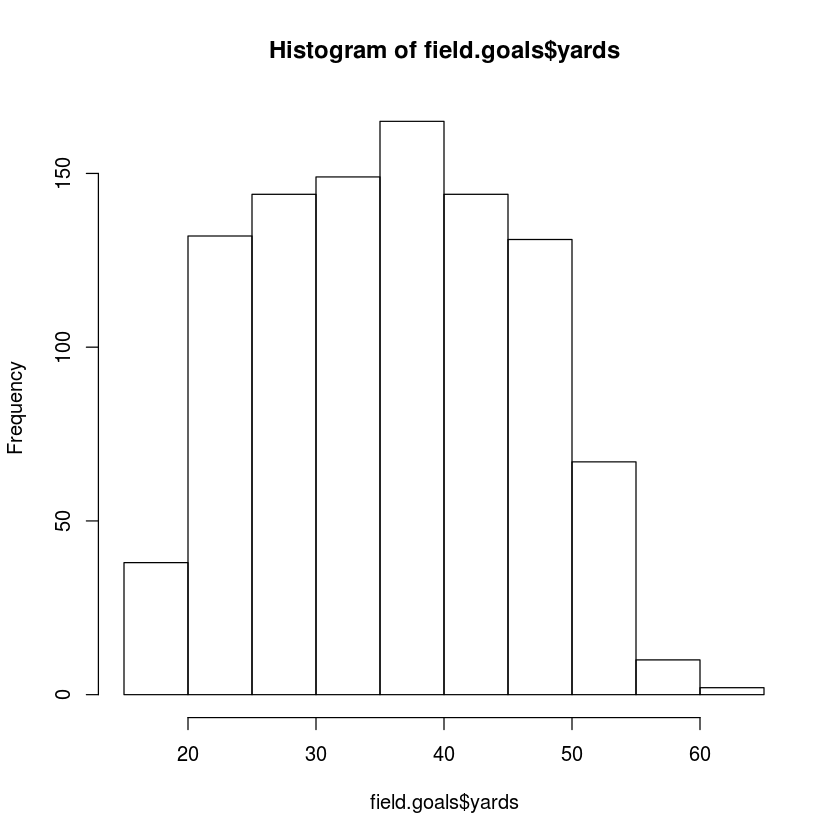

In [16]:
# 看个直方图
hist(field.goals$yards)


FG aborted FG blocked    FG good      FG no 
         8         24        787        163 

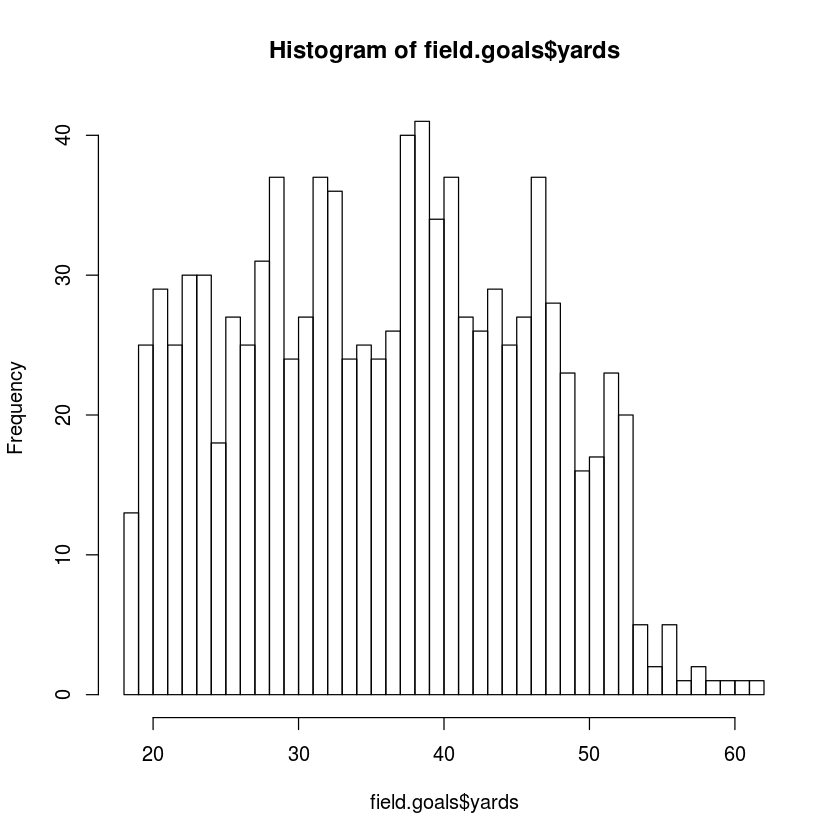

In [17]:
# 刻度够小，看仔细点
hist(field.goals$yards, breaks=35)
table(field.goals$play.type)

In [19]:
# 用lattice做多重图
library(nutshell)
library(lattice)


In [20]:
data(consumption)

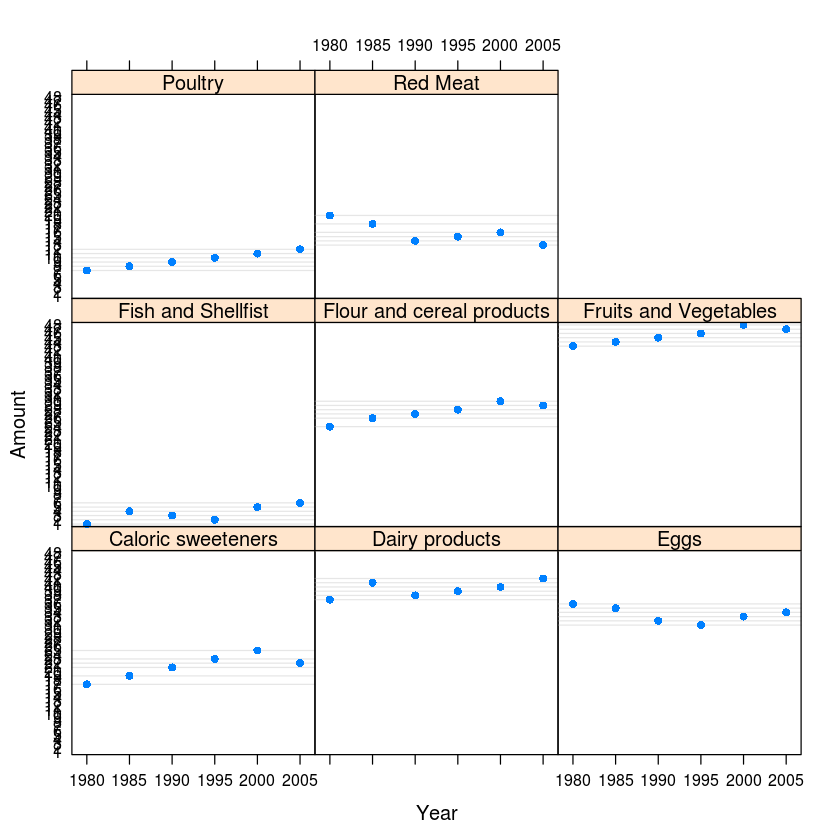

In [21]:
dotplot(Amount~Year|Food, consumption)

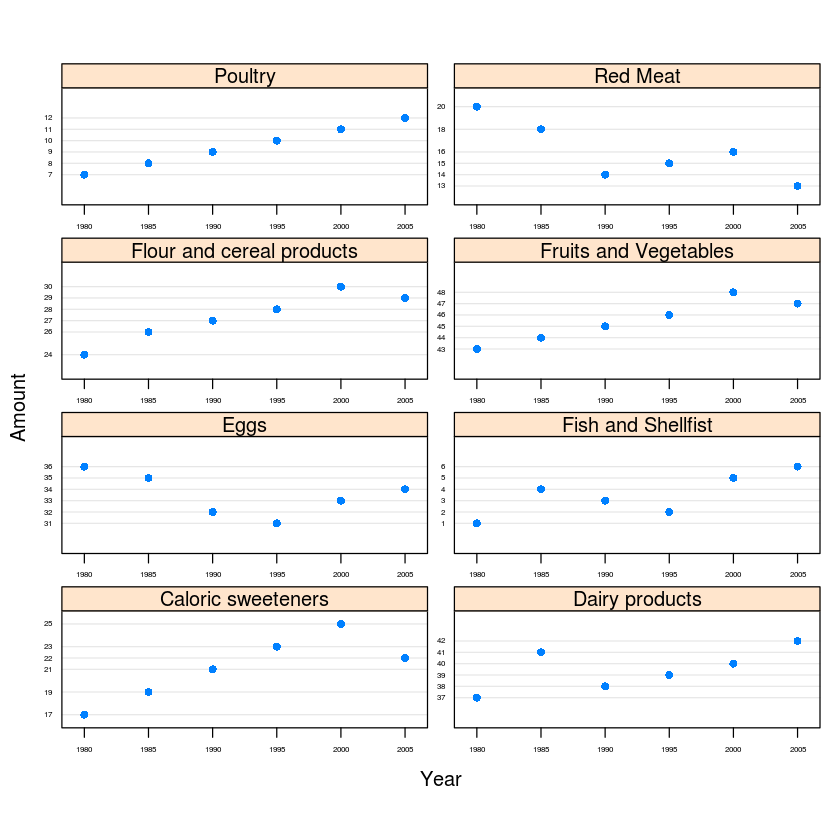

In [23]:
# 上面图画的不好，改改格式
dotplot(Amount ~ Year | Food, data=consumption,
       aspect="xy", scales=list(relation="sliced", cex=.4))

今儿就到这里啦，有什么疑惑的地方，`help()`，`?`等都是良师好友。

2017.6.28 凌晨

In [24]:
sessionInfo()

R version 3.3.2 (2016-10-31)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 17.04

locale:
 [1] LC_CTYPE=zh_CN.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=zh_CN.UTF-8        LC_COLLATE=zh_CN.UTF-8    
 [5] LC_MONETARY=zh_CN.UTF-8    LC_MESSAGES=zh_CN.UTF-8   
 [7] LC_PAPER=zh_CN.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=zh_CN.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] lattice_0.20-34             nutshell_2.0               
[3] nutshell.audioscrobbler_1.0 nutshell.bbdb_1.0          

loaded via a namespace (and not attached):
 [1] digest_0.6.10   crayon_1.3.2    IRdisplay_0.4.4 grid_3.3.2     
 [5] repr_0.10       R6_2.2.0        jsonlite_1.1    magrittr_1.5   
 [9] evaluate_0.10   stringi_1.1.2   uuid_0.1-2      IRkernel_0.7.1 
[13] tools_3.3.2     stringr_1.1.0   pbdZMQ_0